Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 배급한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

#데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno

In [ ]:
import matplotlib as mpl

# 폰트 변환
# Windows
mpl.rc("font", family='NanumGothic.otf')

# 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/vgames2.csv', index_col=0)

In [ ]:
def Year_scaled(input_string):
  if np.isnan(input_string):
    return np.nan

  input_string = str(input_string).split('.')[0]
  
  if len(input_string) == 1:
    input_string = '200' + input_string
  elif len(input_string) == 2:
    if 10 <= int(input_string) <= 23:
      input_string = '20' + input_string
    else:
      input_string = '19' + input_string

  return float(input_string)

df.Year = df.Year.apply(Year_scaled)

#Year의 자릿수를 4자리수로 통일하되, np.nan은 그냥 둡니다

In [ ]:
for p in df.Platform.unique():
  for g in df.Genre.unique():
    index_list = df[(df.Platform==p)&(df.Genre==g)&(df.Year.isnull())]['Year'].index
    df.loc[index_list, 'Year'] = df[(df.Platform==p)&(df.Genre==g)&(~df.Year.isnull())]['Year'].median()

df.Year = df.Year.astype('int64')

#Year의 결측값을, 같은 플랫폼&같은 장르의 중앙값으로 대체하고 int로 바꿉니다다

In [ ]:
def clean_sales(input_string):
  if 'K' in input_string:
    a, b = input_string.replace('K', '*1000').split('*')
    return float(a) * float(b)

  elif 'M' in input_string:
    a, b = input_string.replace('M', '*1000000').split('*')
    return float(a) * float(b)

  else:
    return float(input_string) * 1000000

for col in df.columns[5:]:
  df[col] = df[col].apply(clean_sales)

#판매량의 단위를 통일합니다 

In [ ]:
df['Sales_Total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

#총 판매량 변수 생성성

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Total
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0


In [ ]:
df['performance'] = np.repeat(0, len(df))


In [ ]:
df_performance_stand = df.groupby('Platform')

In [ ]:
df_performance_stand['Sales_Total'].agg(['sum', 'mean', 'min', 'max', 'quantile'])

,sum,mean,min,max,quantile
Platform,,,,,
2600,9.698000e+07,7.291729e+05,70000.0,7810000.0,460000.0
3DO,1.000000e+05,3.333333e+04,20000.0,60000.0,20000.0
3DS,2.473700e+08,4.859921e+05,10000.0,14350000.0,120000.0
DC,1.595000e+07,3.067308e+05,20000.0,2410000.0,135000.0
DS,8.214600e+08,3.797781e+05,10000.0,30010000.0,110000.0
GB,2.554600e+08,2.606735e+06,60000.0,31380000.0,1165000.0
GBA,3.178500e+08,3.866788e+05,10000.0,15840000.0,160000.0
GC,1.989300e+08,3.577878e+05,10000.0,7060000.0,150000.0
GEN,2.835000e+07,1.050000e+06,30000.0,6020000.0,150000.0


In [ ]:
df_performance_stand['Sales_Total'].quantile(.5)

Platform
2600     460000.0
3DO       20000.0
3DS      120000.0
DC       135000.0
DS       110000.0
GB      1165000.0
GBA      160000.0
GC       150000.0
GEN      150000.0
GG        40000.0
N64      270000.0
NES     1375000.0
NG       100000.0
PC        50000.0
PCFX      30000.0
PS       260000.0
PS2      230000.0
PS3      280000.0
PS4      220000.0
PSP       90000.0
PSV       60000.0
SAT      120000.0
SCD       65000.0
SNES     320000.0
TG16      80000.0
WS       215000.0
Wii      200000.0
WiiU     230000.0
X360     280000.0
XB       150000.0
XOne     240000.0
Name: Sales_Total, dtype: float64

In [ ]:
df.loc[1, :]

Name           Candace Kane's Candy Factory
Platform                                 DS
Year                                   2008
Genre                                Action
Publisher                         Destineer
NA_Sales                            40000.0
EU_Sales                                0.0
JP_Sales                                0.0
Other_Sales                             0.0
Sales_Total                         40000.0
performance                               0
Name: 1, dtype: object

In [ ]:
df['Platform_Co'] = np.repeat(np.nan, len(df))

for idx in range(1, len(df)+1):
  print(idx)
  if df.loc[idx, 'Platform'] in ['DS', 'Wii', 'GBA', 'GC','3DS', 'GB', 'NES', 'N64', 'SNES', 'WiiU']:
    df.loc[idx, 'Platform_Co'] = 'Nintendo'
  elif df.loc[idx, 'Platform'] in ['XB','X360', 'XOne']:
    df.loc[idx, 'Platform_Co'] = 'Microsoft'
  elif df.loc[idx, 'Platform'] in ['PSP', 'PS3', 'PS', 'PS4', 'PS2', 'PSV']:
    df.loc[idx, 'Platform_Co'] = 'SONY'
  elif df.loc[idx, 'Platform'] in ['2600']:
    df.loc[idx, 'Platform_Co'] = 'Atari'
  elif df.loc[idx, 'Platform'] in ['SAT', 'DC', 'GEN','SCD', 'GG']:
    df.loc[idx, 'Platform_Co'] = 'SEGA'
  elif df.loc[idx, 'Platform'] in ['PC']:
    df.loc[idx, 'Platform_Co'] = 'PC'
  else:
    df.loc[idx, 'Platform_Co'] = 'etc'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
1175

# EDA와 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

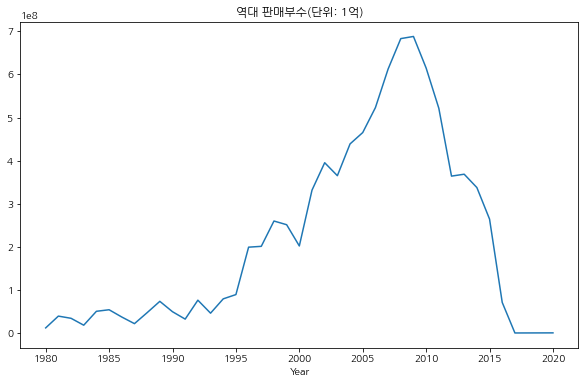

In [ ]:
df.groupby('Year')['Sales_Total'].sum().plot(figsize=(10, 6),
                                             title=('역대 판매부수(단위: 1억)'));

In [ ]:
df[df.Year==2016]['Sales_Total'].sum()

70870000.0

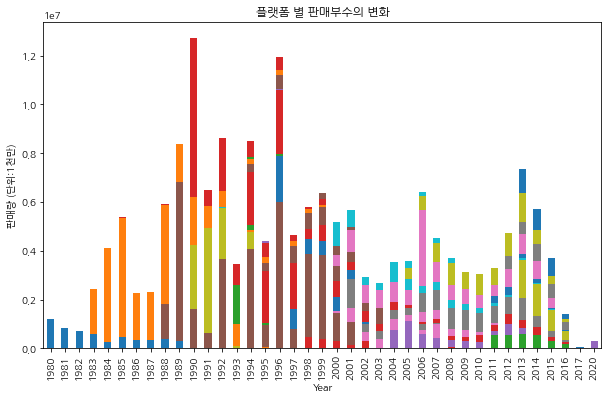

In [ ]:
### 플랫폼의 변화 양상
df.pivot_table(index='Year', columns='Platform')['Sales_Total'].fillna(0).plot(figsize=(10, 6),
                                                                title=('플랫폼 별 판매부수의 변화'),
                                                                stacked=True,
                                                                kind='bar',
                                                                legend=False,
                                                                ylabel=('판매량 (단위:1천만)'));

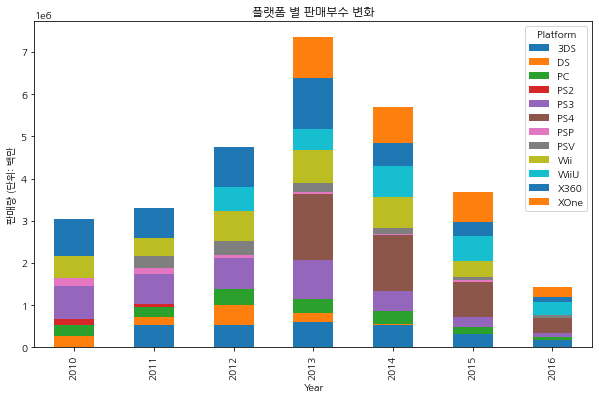

In [ ]:
### 현재 플랫폼 메타
df[(df.Year >= 2010) & (df.Year <= 2016)].pivot_table(index='Year', columns='Platform')['Sales_Total'].fillna(0).plot(kind='bar', stacked=True,
                                                                                                                      figsize=(10, 6),
                                                                                                                      title=('플랫폼 별 판매부수 변화'),
                                                                                                                      ylabel=('판매량 (단위: 백만'));

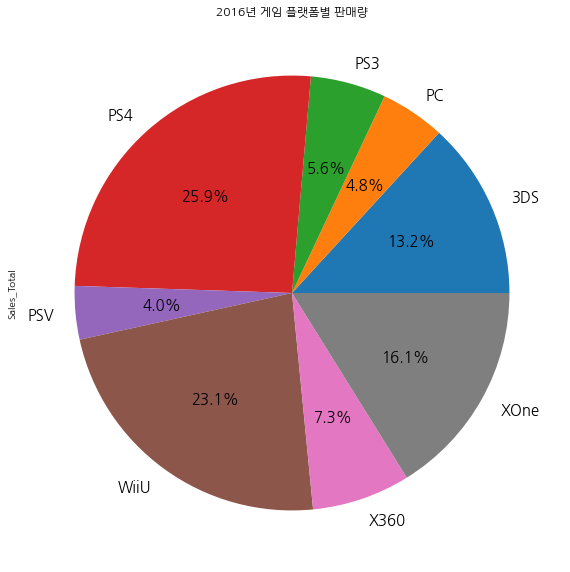

In [ ]:

df[df.Year==2016].pivot_table(index='Platform')['Sales_Total'].plot(kind='pie',
                                                                 title=('2016년 게임 플랫폼별 판매량'),
                                                                 autopct='%.1f%%',
                                                                 figsize=(10, 10),
                                                                 textprops={'fontsize':15});                                          

In [ ]:
monopoly = pd.DataFrame(index=['Microsoft', 'Nintendo', 'SONY', 'PC'], columns=['Monopoly'], data=[23.4, 36.3, 35.5, 4.8])
monopoly

,Monopoly
Microsoft,23.4
Nintendo,36.3
SONY,35.5
PC,4.8


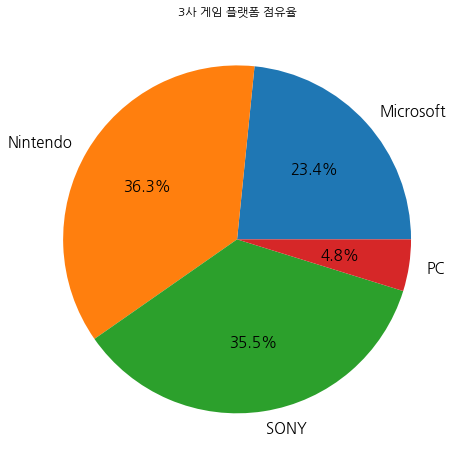

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(monopoly,
        labels=monopoly.index,
        autopct='%.1f%%',
        textprops={'fontsize':15})
plt.title('3사 게임 플랫폼 점유율')
plt.show()

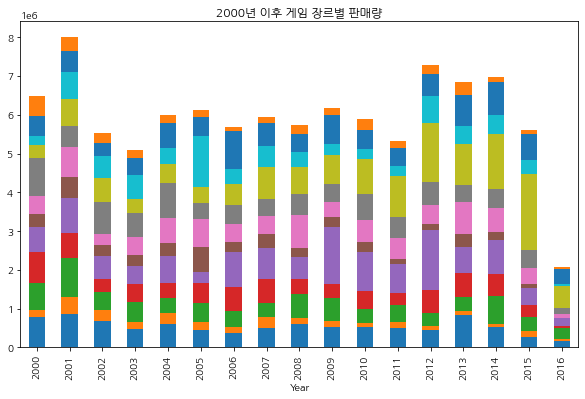

In [ ]:
### 시장의 선호 장르, 선호 플랫폼
df[(df['Year'] >= 2000)&(df['Year']<=2016)].pivot_table(index='Year', columns='Genre')['Sales_Total'].fillna(0).plot(figsize=(10,6),
                                                                                                title=('2000년 이후 게임 장르별 판매량'),
                                                                                                kind='bar',
                                                                                                legend=False,
                                                                                                stacked=True,
                                                                                                );

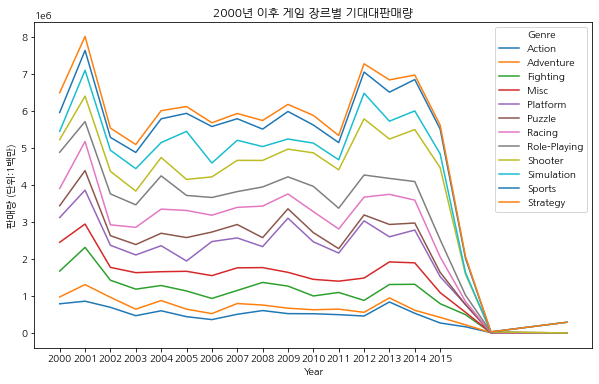

In [ ]:
df[df['Year'] >= 2000].pivot_table(index='Year', columns='Genre')['Sales_Total'].fillna(0).plot(figsize=(10, 6),
                                                                title=('2000년 이후 게임 장르별 기대대판매량'),
                                                                stacked=True,
                                                                xticks=list(range(2000, 2016, 1)),
                                                                kind='line',
                                                                legend=True,
                                                                ylabel=('판매량 (단위:1백만)'));

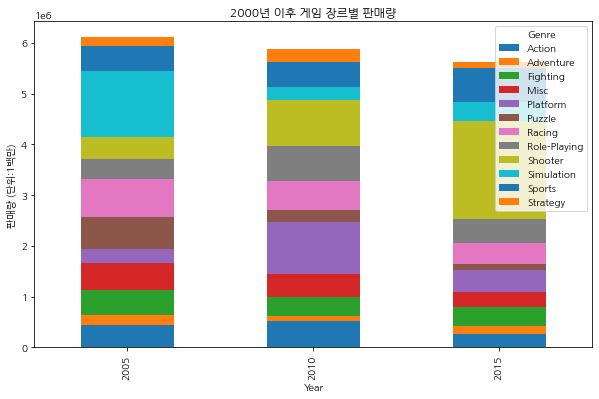

In [ ]:
df[(df['Year']==2005)|(df['Year']==2010)|(df['Year']==2015)].pivot_table(index='Year', columns='Genre')['Sales_Total'].fillna(0).plot(figsize=(10, 6),
                                                                title=('2000년 이후 게임 장르별 판매량'),
                                                                stacked=True,
                                                                kind='bar',
                                                                legend=True,
                                                                ylabel=('판매량 (단위:1백만)'));

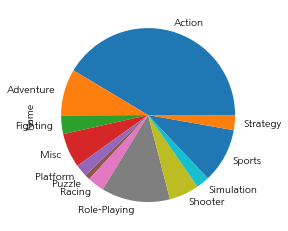

In [ ]:
df[df.Year==2015].groupby('Genre').count()['Name'].plot(kind='pie')

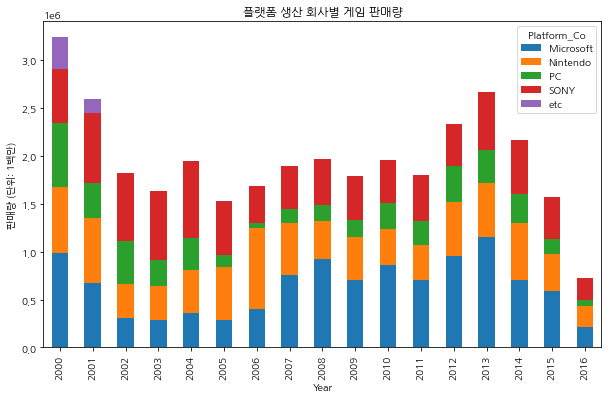

In [ ]:
## 시장의 선호 플랫폼
df[(df.Year<= 2016)&(df.Year >= 2000)&(df.Platform_Co!='SEGA')].pivot_table(index='Year', columns='Platform_Co')['Sales_Total'].fillna(0).plot(title=('플랫폼 생산 회사별 게임 판매량'),
                                                                                  figsize=(10, 6),
                                                                                  kind='bar',
                                                                                  stacked=True,
                                                                                  ylabel=('판매량 (단위: 1백만)'));

In [ ]:
df.pivot_table(index='Year', columns='Genre').fillna(0)['Sales_Total']

In [ ]:
import scipy.stats as stats
group1 = list(df.pivot_table(index='Year', columns='Genre').fillna(0)['Sales_Total'].loc[2005])
group2 = list(df.pivot_table(index='Year', columns='Genre').fillna(0)['Sales_Total'].loc[2010])
group3 = list(df.pivot_table(index='Year', columns='Genre').fillna(0)['Sales_Total'].loc[2015])

In [ ]:
np.random.seed(2)

trend_2005 = []
for _ in range(100000):
  trend_2005_sampling_200 = np.random.choice(group1,size=200,replace=True)
  trend_2005.append(trend_2005_sampling_200.mean())

trend_2010 = []
for _ in range(100000):
  trend_2010_sampling_200 = np.random.choice(group2,
                                           size=200,
                                           replace=True)
  trend_2010.append(trend_2010_sampling_200.mean())

trend_2015 = []
for _ in range(100000):
  trend_2015_sampling_200 = np.random.choice(group3,
                                           size=200,
                                           replace=True)
  trend_2015.append(trend_2015_sampling_200.mean())

In [ ]:
F_statistic, pVal = stats.f_oneway(trend_2005, trend_2010, trend_2015)
print(F_statistic, pVal)

71386.02252068293 0.0


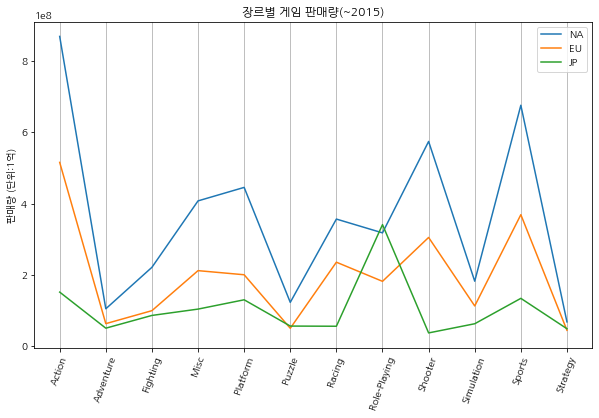

In [ ]:
##지역별 선호장르

group = df[df['Year']<=2015].groupby("Genre").sum()
plt.figure(figsize=(10, 6))
plt.plot(group['NA_Sales'],label="NA")
plt.plot(group['EU_Sales'],label="EU")
plt.plot(group['JP_Sales'],label="JP")
plt.ylabel('판매량 (단위:1억)')
plt.xticks(rotation=70)
plt.grid(axis='x')
plt.title("장르별 게임 판매량(~2015)")
plt.legend()
plt.show()

In [ ]:
NA_ratio = df[(df.Year <= 2015)&(df.Genre=='Role-Playing')].groupby('Genre')['NA_Sales'].sum() / df[df.Year <= 2015].groupby('Genre')['NA_Sales'].sum().sum()
EU_ratio = df[(df.Year <= 2015)&(df.Genre=='Role-Playing')].groupby('Genre')['EU_Sales'].sum() / df[df.Year <= 2015].groupby('Genre')['EU_Sales'].sum().sum()
JP_ratio = df[(df.Year <= 2015)&(df.Genre=='Role-Playing')].groupby('Genre')['JP_Sales'].sum() / df[df.Year <= 2015].groupby('Genre')['JP_Sales'].sum().sum()

np.random.seed(2)

NA_ratio_mean = []
for _ in range(100000):
  NA_ratio_sampling_200 = np.random.choice([0, 1],
                                           p=[1-NA_ratio[0], NA_ratio[0]],
                                           size=200,
                                           replace=True)
  NA_ratio_mean.append(NA_ratio_sampling_200.mean())

EU_ratio_mean = []
for _ in range(100000):
  EU_ratio_sampling_200 = np.random.choice([0, 1],
                                           p=[1-EU_ratio[0], EU_ratio[0]],
                                           size=200,
                                           replace=True)
  EU_ratio_mean.append(EU_ratio_sampling_200.mean())

JP_ratio_mean = []
for _ in range(100000):
  JP_ratio_sampling_200 = np.random.choice([0, 1],
                                           p=[1-JP_ratio[0], JP_ratio[0]],
                                           size=200,
                                           replace=True)
  JP_ratio_mean.append(JP_ratio_sampling_200.mean())

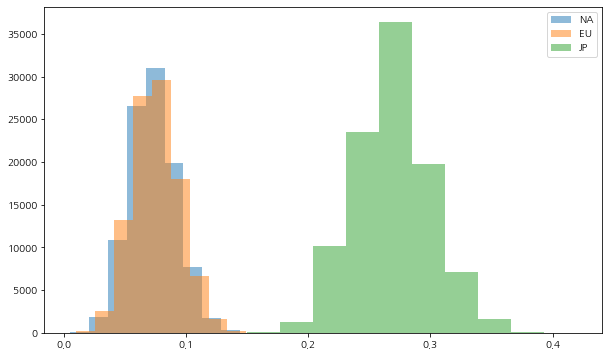

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(NA_ratio_mean, alpha=0.5, label='NA')
plt.hist(EU_ratio_mean, alpha=0.5, label='EU')
plt.hist(JP_ratio_mean, alpha=0.5, label='JP')
plt.legend()
plt.show()

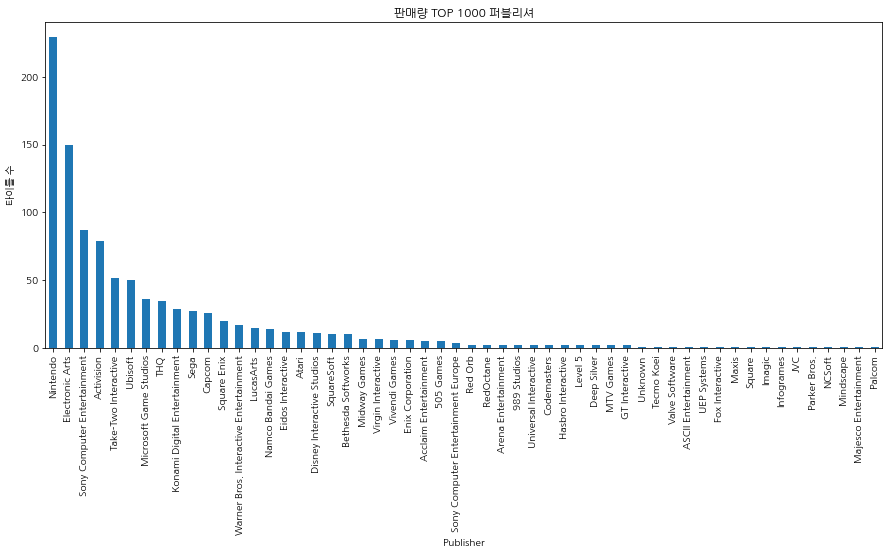

In [ ]:
##판매량 높은 타이틀의 특징
Good = df[df.Year <= 2015].sort_values('Sales_Total', ascending=False).iloc[:1000, :]
Good.groupby('Publisher')['Name'].count().sort_values(ascending=False).plot(figsize=(15, 6),
                                                                            ylabel=('타이틀 수'),
                                                                            title=('판매량 TOP 1000 퍼블리셔'),
                                                                            kind='bar');

In [ ]:
top100 = df[(df.Year <= 2015)&(df.Year <= 2015)].sort_values('Sales_Total', ascending=False).iloc[:100, :]

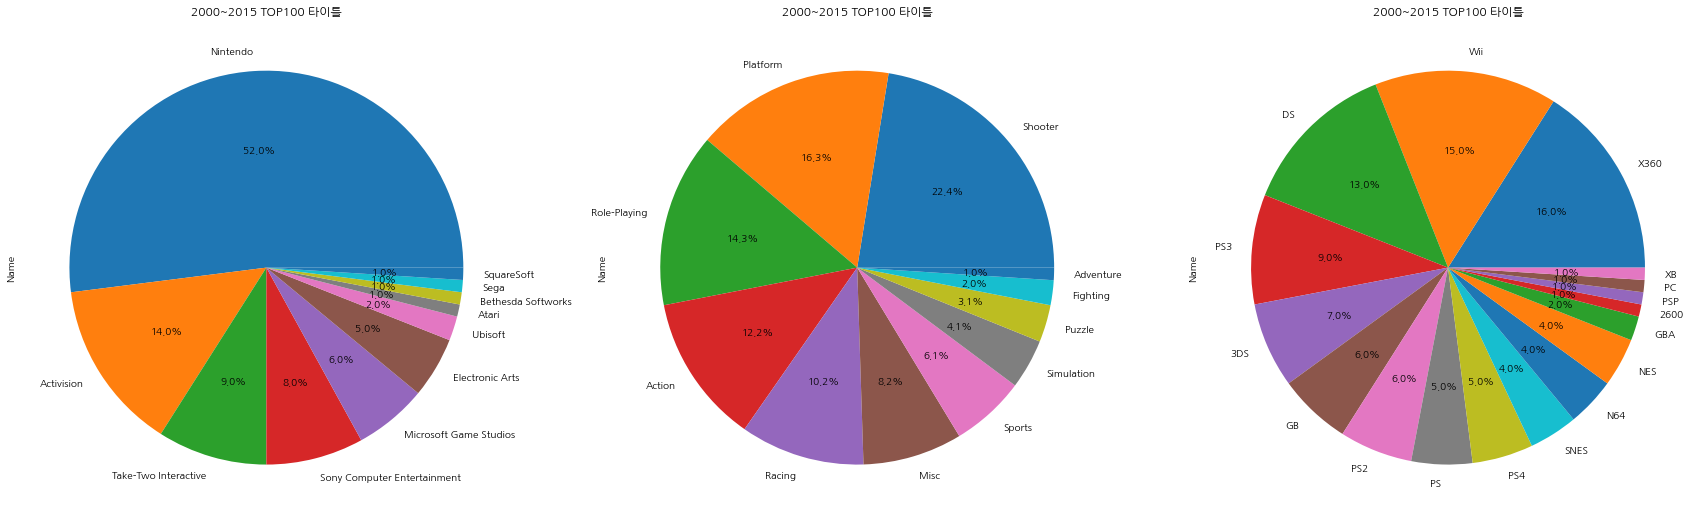

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(30, 30))

top100.groupby('Publisher').count().sort_values('Name', ascending=False)['Name'].plot(
                                                                              kind='pie',
                                                                              title=('2000~2015 TOP100 타이틀'),
                                                                              ax=ax[0],
                                                                              autopct='%.1f%%');

top100.groupby('Genre').count().sort_values('Name', ascending=False)['Name'].plot(
                                                                              kind='pie',
                                                                              title=('2000~2015 TOP100 타이틀'),
                                                                              ax=ax[1],
                                                                              autopct='%.1f%%');
                                                                              
top100.groupby('Platform').count().sort_values('Name', ascending=False)['Name'].plot(
                                                                              kind='pie',
                                                                              title=('2000~2015 TOP100 타이틀'),
                                                                              ax=ax[2],
                                                                              autopct='%.1f%%');
                                                                              
                                                                                                                                                     

In [ ]:
##플랫폼별 평균 판매량 (판매량 / 발매량)
##장르별 평균 판매량 
##플랫폼별 장르별 평균 판매량
##플랫폼별 장르별 연도별 평균 판매량

In [ ]:
##플랫폼별 평균 판매량 (판매량 / 발매량)
now_platform = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PV', 'X360', 'XOne']
df['Now'] = np.repeat(0, len(df)) 

for idx in range(1, len(df)+1):
  if df.loc[idx, 'Platform'] in now_platform:
    df.loc[idx, 'Now'] = 1



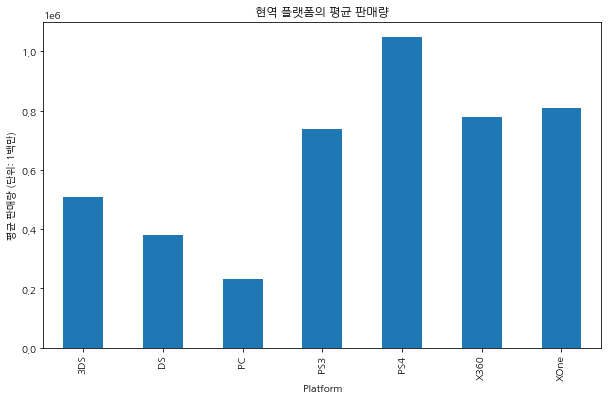

In [ ]:
df[(df.Year <= 2015)&(df.Year >= 2000)&(df.Now == 1)].groupby('Platform')['Sales_Total'].mean().plot.bar(title=('현역 플랫폼의 평균 판매량'),
                                                                                                         ylabel=('평균 판매량 (단위: 1백만)'),
                                                                                                         figsize=(10, 6));

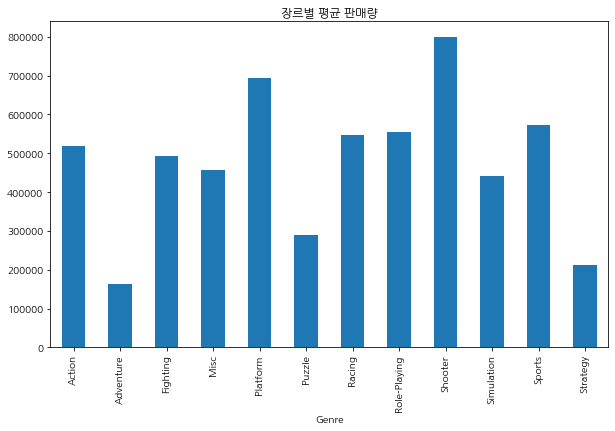

In [ ]:
##장르별 평균 판매량
df[(df.Year <= 2015)&(df.Year >= 2000)].groupby('Genre')['Sales_Total'].mean().plot.bar(title=('장르별 평균 판매량'),
                                                   figsize=(10, 6));

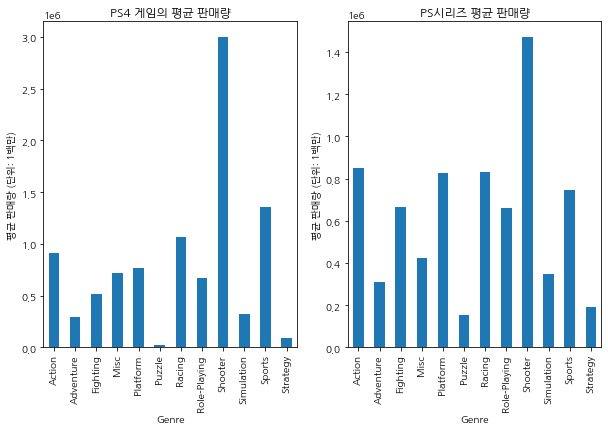

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))

df[(df.Year <= 2015)&(df.Year >= 2000)&(df.Platform == 'PS4')].groupby('Genre')['Sales_Total'].mean().plot.bar(figsize=(10, 6),
                                                                                                               title=('PS4 게임의 평균 판매량'),
                                                                                                               ylabel=('평균 판매량 (단위: 1백만)'),
                                                                                                               ax=ax[0]);

df[(df.Year <= 2015)&(df.Year >= 2000)&((df.Platform == 'PS4')|(df.Platform=='PS3'))].groupby('Genre')['Sales_Total'].mean().plot.bar(figsize=(10, 6),
                                                                                                               title=('PS시리즈 평균 판매량'),
                                                                                                               ylabel=('평균 판매량 (단위: 1백만)'),
                                                                                                               ax=ax[1]);

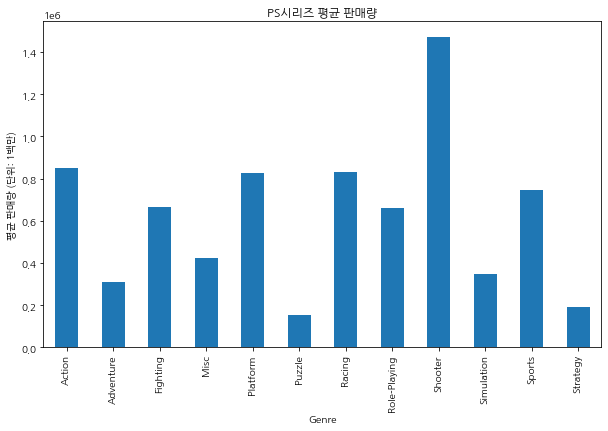

In [ ]:
df[(df.Year <= 2015)&(df.Year >= 2000)&((df.Platform == 'PS4')|(df.Platform=='PS3'))].groupby('Genre')['Sales_Total'].mean().plot.bar(figsize=(10, 6),
                                                                                                               title=('PS시리즈 평균 판매량'),
                                                                                                               ylabel=('평균 판매량 (단위: 1백만)'),
                                                                                                               ax=ax[1]);

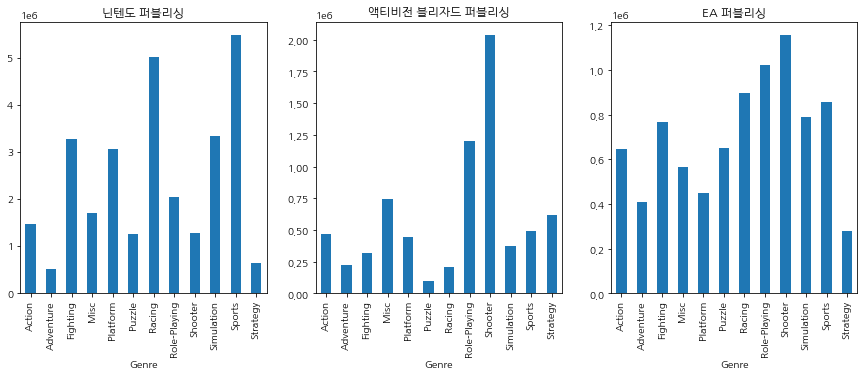

In [ ]:
##퍼블리셔 선택
f, ax = plt.subplots(1, 3, figsize=(15, 5));
df[(df.Year >= 2000)&(df.Year <= 2015)&(df.Publisher=='Nintendo')].groupby('Genre')['Sales_Total'].mean().plot.bar(
                                                                                                               title=('닌텐도 퍼블리싱'),
                                                                                                               ax=ax[0]);

df[(df.Year >= 2000)&(df.Year <= 2015)&((df.Publisher=='Activision')|(df.Publisher=='Activision Blizzard'))].groupby('Genre')['Sales_Total'].mean().plot.bar(title=('액티비전 블리자드 퍼블리싱'),
                                                                                                                                                              ax=ax[1]);

df[(df.Year >= 2000)&(df.Year <= 2015)&(df.Publisher=='Electronic Arts')].groupby('Genre')['Sales_Total'].mean().plot.bar(title=('EA 퍼블리싱'), ax=ax[2]);

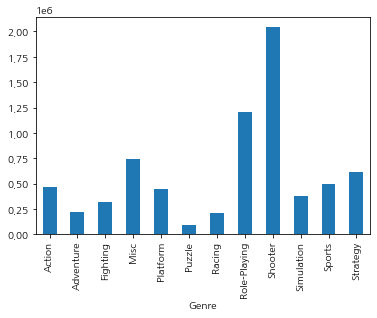

In [ ]:
|df[(df.Year >= 2000)&(df.Year <= 2015)&((df.Publisher=='Activision')|(df.Publisher=='Activision Blizzard'))].groupby('Genre')['Sales_Total'].mean().plot.bar(title=('액티비전 블리자드 퍼블리싱'),
                                                                                                                                                              ax=ax[1])

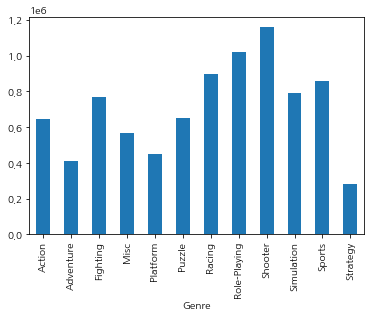

In [ ]:
df[(df.Year >= 2000)&(df.Year <= 2015)&(df.Publisher=='Electronic Arts')].groupby('Genre')['Sales_Total'].mean().plot.bar()

([<matplotlib.patches.Wedge at 0x7f2c50be9650>,
 [Text(1.07108297618745, 0.2505618848137814, 'NA'),
  Text(0.8421820872597583, 0.7076223087910648, 'EU'),
  Text(-0.23484742399811595, 1.0746379331856144, 'JP')])

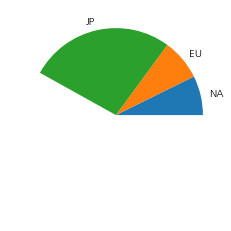

In [ ]:
##틈새시장

#일본의 시장 규모
ratio = [NA_ratio, EU_ratio, JP_ratio]
labels = ['NA', 'EU', 'JP']
plt.pie(ratio, labels=labels)

In [ ]:
ratio

[Genre
 Role-Playing    0.073148
 Name: NA_Sales, dtype: float64, Genre
 Role-Playing    0.076137
 Name: EU_Sales, dtype: float64, Genre
 Role-Playing    0.269917
 Name: JP_Sales, dtype: float64]

In [ ]:
df[df.Platform==''

0.14480055182624202